In [2]:
import pandas as pd
import numpy as np
import os

import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.utils import shuffle
from plsr import PLSRComponents
from brokenaxes import brokenaxes

from preprocessing.dataset import DatasetSpectra

2025-01-04 16:10:20.134077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735999820.305933 2365319 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735999820.353506 2365319 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

In [4]:
file_path = '../data/dataset_681.csv'
domain_path = '../data/dataset_565_domain.csv'

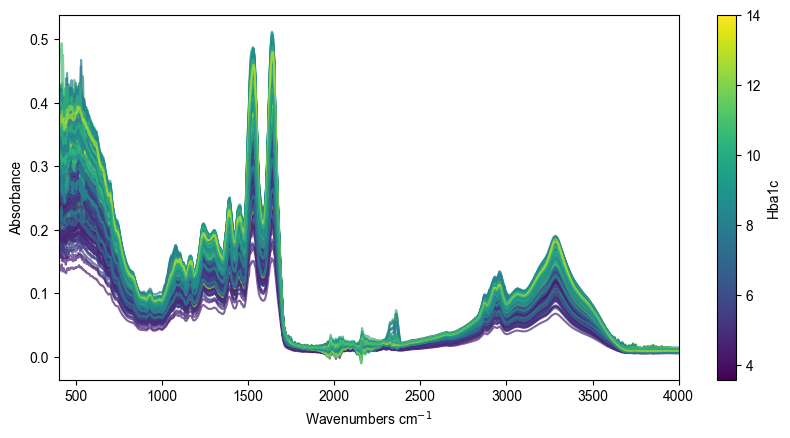

In [5]:
dataset = DatasetSpectra(file_path, domain_path)
dataset.select_max_hba1c(14)
dataset.select_region([400, 4000])
dataset.drop_samples([287, 636])
fig1, ax1 = dataset.plot_spectra()
plt.subplots_adjust(bottom=0.15)
plt.savefig('../figures/spectra_before_preproc.png', dpi=300, transparent=True)
plt.savefig('../figures/spectra_before_preproc.svg', format='svg', transparent=True)

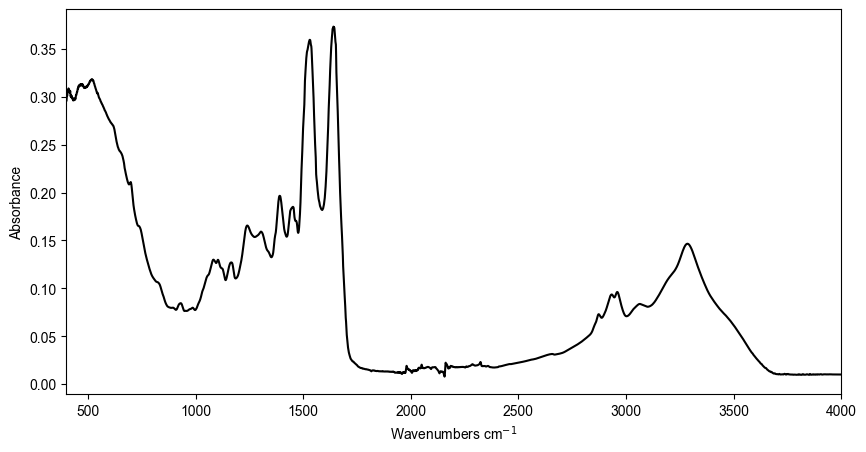

In [6]:
plt.figure(figsize=(10, 5))

spectra = dataset.spectra.mean(axis=0)
wn = dataset.wavenumbers
plt.plot(wn, spectra, color='k')
plt.xlabel("Wavenumbers cm$^{-1}$")
plt.ylabel("Absorbance")
plt.xlim([400, 4000])
plt.savefig('../figures/mean_spectra_before.png', dpi=300, transparent=True)
plt.savefig('../figures/mean_spectra_before.svg', format='svg', transparent=True)

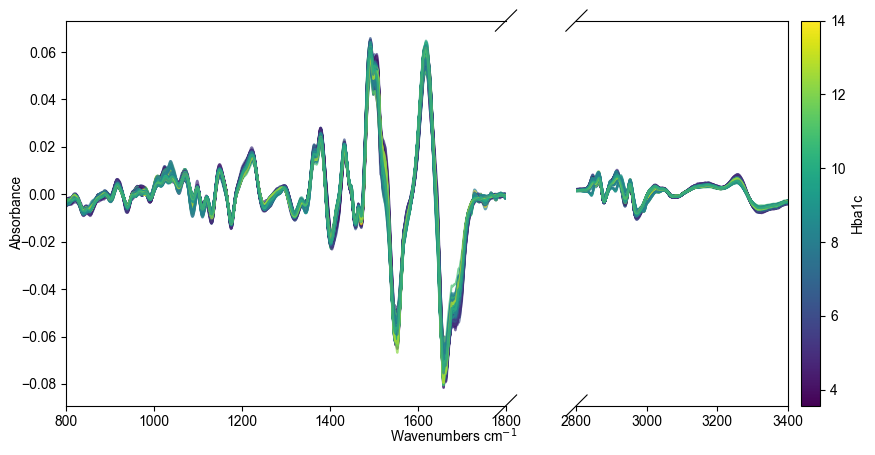

In [7]:
# dataset.baseline_corr()
dataset.savgol_filter(window_length=32, polyorder=2, deriv=1)
dataset.normalization('vector')
dataset.select_region([[800, 1800], [2800, 3400]])
# dataset.select_region([800, 1800])
fig2, ax2 = dataset.plot_spectra()
plt.savefig('../figures/spectra_after_preproc.png', dpi=300, transparent=True)
plt.savefig('../figures/spectra_after_preproc.svg', format='svg', transparent=True)

(<Figure size 1000x500 with 2 Axes>,
 <Axes: xlabel='Wavenumbers cm$^{-1}$', ylabel='Absorbance'>)

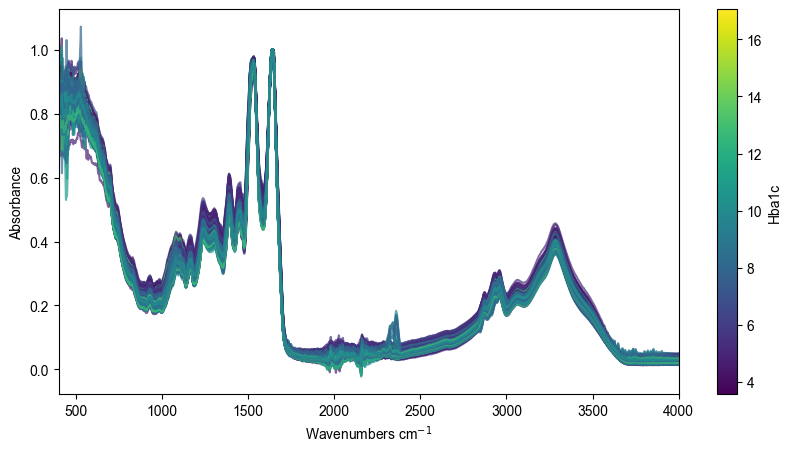

In [11]:
dataset = DatasetSpectra(file_path, domain_path)
dataset.normalization(kind='amide')
dataset.select_region([400, 4000])

spectra = dataset.spectra
wavenumbers = dataset.wavenumbers
hba1c = dataset.hba1c

dataset.plot_spectra()

In [17]:
spectra.shape

(681, 7466)

In [28]:
hba1c.shape

(681,)

In [36]:
df_spectra = pd.DataFrame(spectra)
df_spectra['HbA1c'] = hba1c

In [95]:
q25, q75 = np.percentile(hba1c, [25, 75])

print("Q1:", q25, "Q3:", q75)

hba1c_q25 = hba1c <= q25
hba1c_q75 = hba1c >= q75

Q1: 5.3 Q3: 8.93


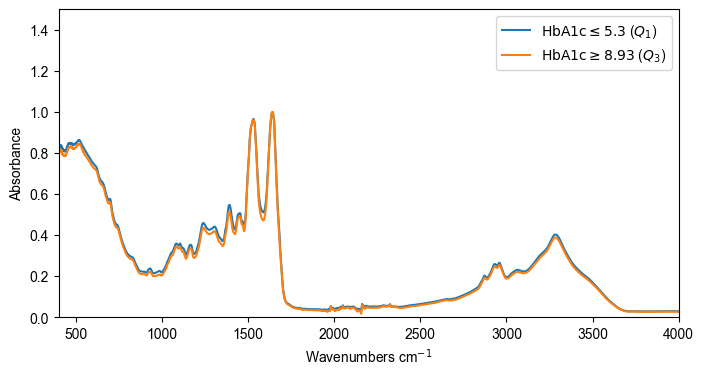

In [88]:
plt.figure(figsize=(8, 4))
plt.plot(wavenumbers, spectra[hba1c_q25].mean(axis=0), label=r'$\text{HbA1c} \leq 5.3$ ($Q_1$)')
plt.plot(wavenumbers, spectra[hba1c_q75].mean(axis=0), label=r'$\text{HbA1c} \geq 8.93$ ($Q_3$)')

plt.xlabel("Wavenumbers cm$^{-1}$")
plt.ylabel("Absorbance")
plt.xlim([400, 4000])
plt.ylim([0.0, 1.5])
plt.legend()

plt.savefig("../figures/mean_spectra_hba1c.png", dpi=300, transparent=True)

In [80]:
df = pd.read_csv(file_path)

In [77]:
(df['HbA1c'] >= 8.93).sum()

np.int64(171)

In [78]:
(df['HbA1c'] <= 5.3).sum()

np.int64(171)